# 2024 Coding Challenge: Automated Object Detection and Counting

**Objective:** Develop a Python-based application that uses computer vision techniques to count and classify different objects from a set of images. The system should be able to differentiate at least three types of objects (e.g., cars, bicycles, pedestrians) in diverse lighting and background conditions. 

## Data Preparation

1. Download Data:
- Run the download_data.py script to download the dataset:

2. Preprocess Data:
- Use the provided scripts in src/data_preprocessing.py to preprocess the images.

### 1. Download Data:

Matplotlib is building the font cache; this may take a moment.


File already exists.
Download complete!
File already exists.
Files already extracted.
Extraction complete!
Files already extracted.
loading annotations into memory...
Done (t=21.85s)
creating index...
index created!


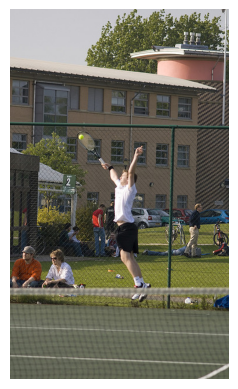

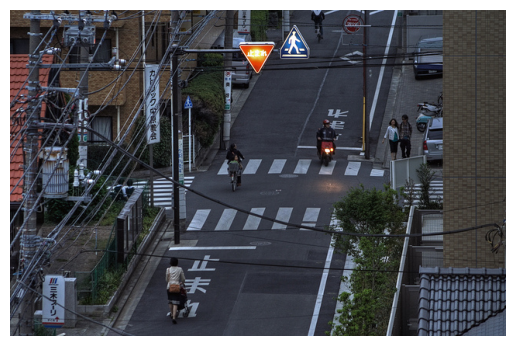

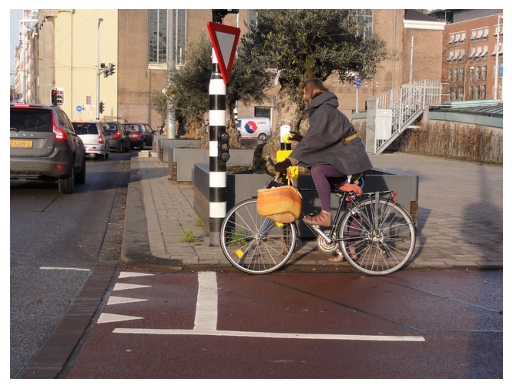

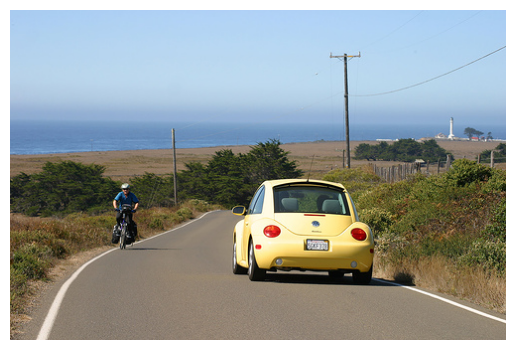

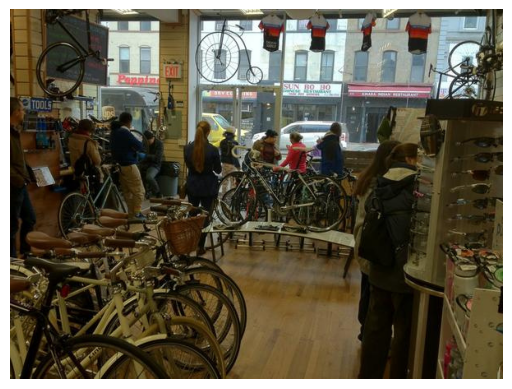

In [1]:
# run 'download_data.py script' to download and get COCO dataset
# examine 5 images
# %run ./../scripts/download_data.py

In [2]:
# from pycocotools.coco import COCO
# import os
# from matplotlib import image
# from pathlib import Path

# annFile = './../data/raw/coco_annotations/annotations/instances_train2017.json'
# coco=COCO(annFile)
# classes = ['pedestrian', 'car', 'bicycle']
# # Get category IDs and annotation IDs
# catIds = coco.getCatIds(catNms=classes)
# annsIds = coco.getAnnIds(catIds=catIds)
# PROCESSED_MASK_DIR = './../data/processed/masks'
# # Create folders named after annotation categories
# for cat in catIds:
#     Path(os.path.join("./your_output_folder",coco.loadCats(cat)[0]['name'])).mkdir(parents=True, exist_ok=True)

# for ann in annsIds:
#     # Get individual masks
#     mask = coco.annToMask(coco.loadAnns(ann)[0])
#     # Save masks to BW images
#     file_path = os.path.join(PROCESSED_MASK_DIR,coco.loadCats(coco.loadAnns(ann)[0]['category_id'])[0]['name'],coco.loadImgs(coco.loadAnns(ann)[0]['image_id'])[0]['file_name'])
#     image.imsave(file_path, mask, cmap="gray")

### 2. Prep Data:

In [1]:
# %run ./../src/data_prep.py

2024-06-11 21:14:32.225046: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


loading annotations into memory...
Done (t=18.57s)
creating index...
index created!
loading annotations into memory...
Done (t=0.61s)
creating index...
index created!
label_map.pbtxt created at ./../data/processed/label_map.pbtxt


## Training

In [ ]:
#download pre-trained model for finetuning
# !wget -c http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

In [ ]:
#unzip downloaded pre-trained model
# !tar -xf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

In [2]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [1]:
%run ./../src/train_eval.py

2024-06-12 18:09:09.631830: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

### Load COCO Annotations

In [3]:
# from pycocotools.coco import COCO
# import os
# import cv2
# import numpy as np
# from PIL import Image

In [4]:
# import sys
# import os

# # Find the absolute path to the src directory
# project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
# src_path = os.path.join(project_root, 'src')

# # Add the src directory to the Python path
# sys.path.insert(0, src_path)

# # Now you can import ann_to_mask
# import ann_to_mask as an

In [5]:

# # Paths to the dataset
# annotation_file = './../data/raw/coco_annotations/annotations/instances_train2017.json'
# image_dir = './../data/raw/coco_train2017/train2017'

# # Load COCO annotations
# coco = an.load_coco_annotations(annotation_file)

loading annotations into memory...
Done (t=13.89s)
creating index...
index created!


In [6]:
# # Define category names of interest (Adjust if necessary)
# category_names = ['person', 'bicycle', 'car']
# category_ids, image_ids = an.get_category_and_image_ids(coco, category_names)

#### Filter Annotations

In [7]:
# # Filter annotations for the selected categories
# annotations = an.filter_annotations(coco, category_ids, image_ids)

### Load and Resize Images

In [8]:
# # Create directories for resized images and masks (Adjust if necessary)
# os.makedirs('./../data/preprocessed/images', exist_ok=True)
# os.makedirs('./../data/preprocessed/masks', exist_ok=True)
# os.makedirs('./../data/preprocessed/combined_masks', exist_ok=True)

# for img_id in image_ids:
#     try:
#         img_info = coco.loadImgs(img_id)[0]
#         img_path = os.path.join(image_dir, img_info['file_name'])
#         resized_image = an.resize_image(img_path)

#         # Save resized image
#         save_path = os.path.join('./../data/preprocessed/images', img_info['file_name'])
#         Image.fromarray(resized_image).save(save_path)
#     except Exception as e:
#         print(f"Error processing image {img_id}: {e}")


### Create Masks

In [9]:
# for ann in annotations:
#     try:
#         img_info = coco.loadImgs(ann['image_id'])[0]
#         img_path = os.path.join(image_dir, img_info['file_name'])
#         resized_image = an.resize_image(img_path)
        
#         mask = an.create_mask(ann, resized_image.shape)
        
#         # Save mask
#         mask_path = os.path.join('./../data/preprocessed/masks', f"{ann['id']}.png")
#         Image.fromarray(mask * 255).save(mask_path)
#     except Exception as e:
#         print(f"Error processing annotation {ann['id']}: {e}")

Error creating mask for annotation 900200294918: cannot reshape array of size 1 into shape (3,2)
Error processing annotation 900200294918: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900100421893: cannot reshape array of size 1 into shape (3,2)
Error processing annotation 900100421893: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900100495626: cannot reshape array of size 1 into shape (3,2)
Error processing annotation 900100495626: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900300057361: cannot reshape array of size 1 into shape (3,2)
Error processing annotation 900300057361: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900100057361: cannot reshape array of size 1 into shape (3,2)
Error processing annotation 900100057361: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900100190494: cannot reshape a

In [10]:
# for img_id in image_ids:
#     try:
#         img_info = coco.loadImgs(img_id)[0]
#         img_path = os.path.join(image_dir, img_info['file_name'])
#         resized_image = an.resize_image(img_path)
        
#         img_annotations = [ann for ann in annotations if ann['image_id'] == img_id]
#         combined_mask = an.create_combined_mask(img_annotations, resized_image.shape)
        
#         # Save combined mask
#         mask_path = os.path.join('./../data/preprocessed/combined_masks', f"{img_info['file_name'].split('.')[0]}_mask.png")
#         Image.fromarray(combined_mask * 255).save(mask_path)
#     except Exception as e:
#         print(f"Error processing image {img_id}: {e}")

Error creating mask for annotation 900200294918: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900100421893: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900100495626: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900300057361: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900100057361: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900100190494: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900200329766: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900100264241: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900100372804: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annotation 900100129108: cannot reshape array of size 1 into shape (3,2)
Error creating mask for annota

In [11]:
# subprocess.run(['python', './../src/data_preprocessing.py'])